In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ear-dataset-for-100-person/images/images/057/057_back_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_right_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_front_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_up_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_left_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_zoom_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/057/057_down_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_front_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_up_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_back_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_right_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_down_ear.jpg
/kaggle/input/ear-dataset-for-100-person/images/images/086/086_left_ear.jpg
/kaggle/inpu

In [121]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import cv2
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from torch.utils.data import random_split
from torchvision import models, transforms, datasets
from torch.optim import lr_scheduler

In [122]:
dataset_dir='/kaggle/input/ear-dataset-for-100-person/images/images'


In [123]:
df = pd.read_csv('/kaggle/input/ear-dataset-for-100-person/ear/ear/ear_biometrics.csv')
df.head()


,Person ID,Image Name
0,0,000_back_ear.jpg
1,0,000_down_ear.jpg
2,0,000_front_ear.jpg
3,0,000_left_ear.jpg
4,0,000_right_ear.jpg


In [124]:
total_image_count = 0  # Initialize total image count

# Iterate over each user directory
for user_dir in os.listdir(dataset_dir):
    user_dir_path = os.path.join(dataset_dir, user_dir)
    if os.path.isdir(user_dir_path):
        # Count the number of image files in the user directory
        image_count = sum(1 for file in os.listdir(user_dir_path) if file.endswith('.jpg') or file.endswith('.png'))  # Adjust file extension filtering as needed
        print(f"Directory: {user_dir}, Image Count: {image_count}")
        total_image_count += image_count

print(f"Total Number of Images: {total_image_count}")

Directory: 057, Image Count: 7
Directory: 086, Image Count: 7
Directory: 061, Image Count: 7
Directory: 048, Image Count: 7
Directory: 053, Image Count: 7
Directory: 051, Image Count: 7
Directory: 095, Image Count: 7
Directory: 018, Image Count: 7
Directory: 044, Image Count: 7
Directory: 007, Image Count: 7
Directory: 009, Image Count: 7
Directory: 012, Image Count: 7
Directory: 029, Image Count: 7
Directory: 025, Image Count: 7
Directory: 078, Image Count: 7
Directory: 001, Image Count: 7
Directory: 056, Image Count: 7
Directory: 042, Image Count: 7
Directory: 000, Image Count: 7
Directory: 082, Image Count: 7
Directory: 055, Image Count: 7
Directory: 076, Image Count: 7
Directory: 091, Image Count: 7
Directory: 094, Image Count: 7
Directory: 027, Image Count: 7
Directory: 080, Image Count: 7
Directory: 041, Image Count: 7
Directory: 036, Image Count: 7
Directory: 070, Image Count: 7
Directory: 105, Image Count: 7
Directory: 071, Image Count: 7
Directory: 035, Image Count: 7
Director

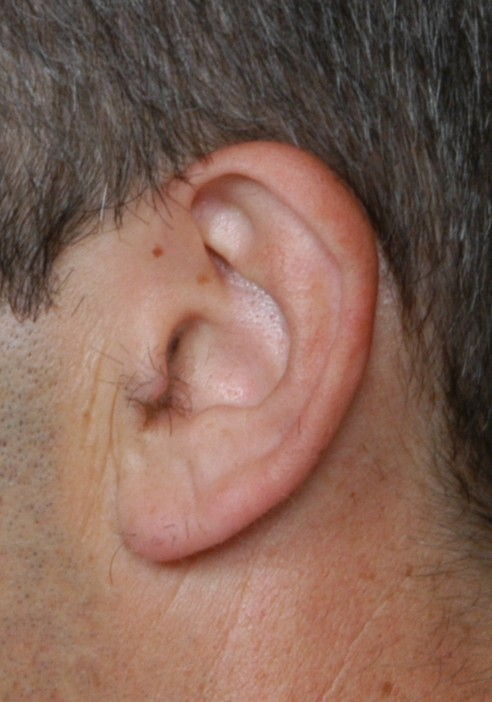

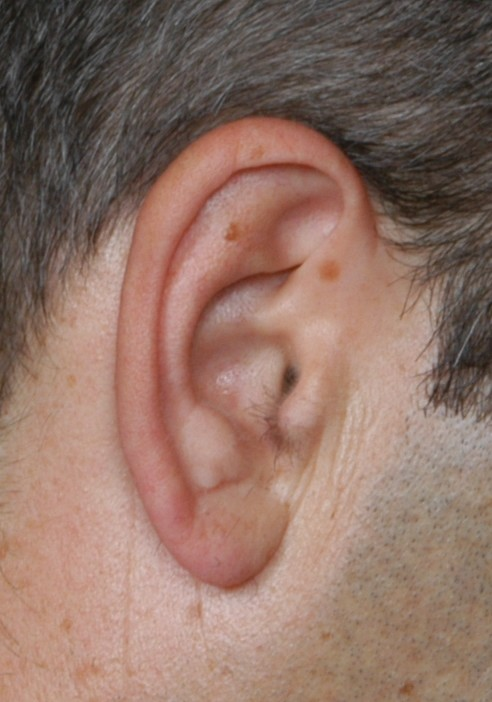

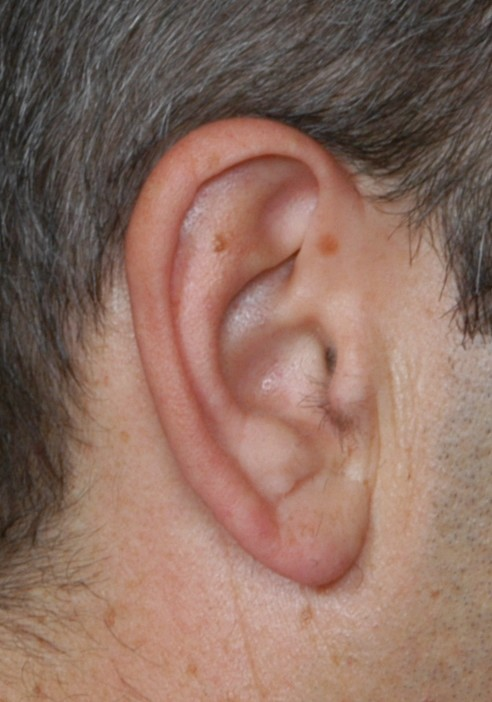

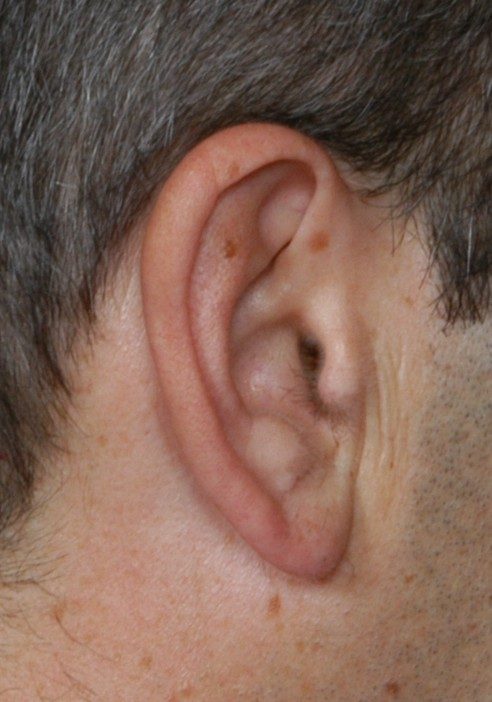

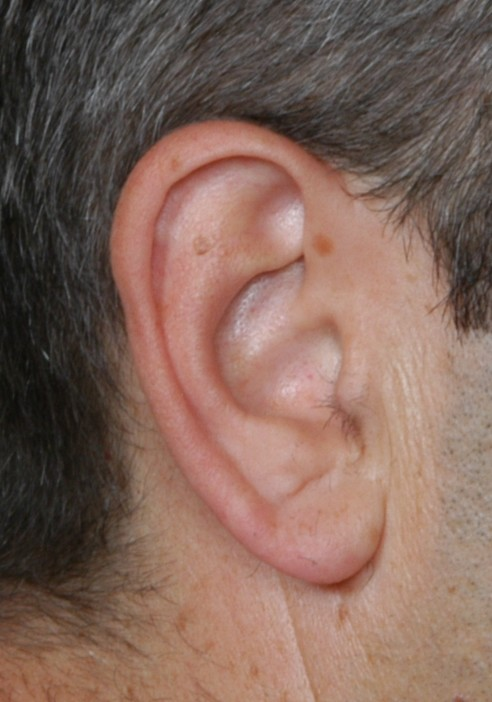

In [125]:
import pandas as pd
import random
from IPython.display import Image

#/kaggle/input/ear-dataset-for-100-person/images/images/000/000_back_ear.jpg
# Concatenate the directory path with the image name
image_paths = [f"/kaggle/input/ear-dataset-for-100-person/images/images/{person_id:03d}/{fname}" for person_id, fname in zip(df["Person ID"], df["Image Name"])]


# Visualize the images
for path in image_paths[:5]:
    display(Image(filename=path))

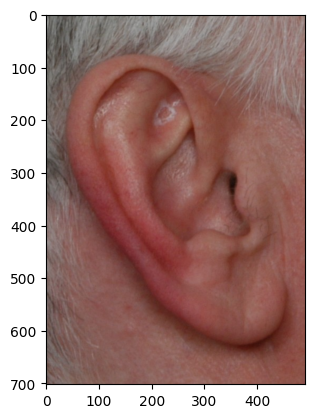

In [126]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory to save the cropped images
output_dir = "/kaggle/working/output/cropped_images"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Sort the image paths based on the person's name
sorted_image_paths = sorted(image_paths, key=lambda x: int(os.path.basename(x).split('_')[0]))

for i in sorted_image_paths:
    image = cv2.imread(i)

    # Check if the image path contains the word "zoom"
    if 'zoom' not in i.lower():
        # Define the region of interest (ROI) containing the ear
        x, y, w, h = 80, 110, 320, 490  # Example values, adjust according to your specific case

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Extract the filename from the original image path
        filename = os.path.basename(i)

        # Define the path to save the cropped image
        output_path = os.path.join(output_dir, filename)

        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)

    else:
        # Display the original image without any changes
        filename = os.path.basename(i)
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, cropped_image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        

In [127]:
import os
import shutil

# Directory containing the original images
input_directory = "/kaggle/working/output/cropped_images"

# Output directory where sorted images will be saved
output_directory = "/kaggle/working/output/sorted_images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Iterate through the filenames in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):
        # Extract the person ID from the filename
        person_id = filename.split('_')[0]
        
        # Create a directory for the person if it doesn't exist
        person_directory = os.path.join(output_directory, person_id)
        os.makedirs(person_directory, exist_ok=True)
        
        # Construct the paths for the input and output files
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(person_directory, filename)
        
        # Move or copy the image to the directory for the person
        shutil.copyfile(input_path, output_path)


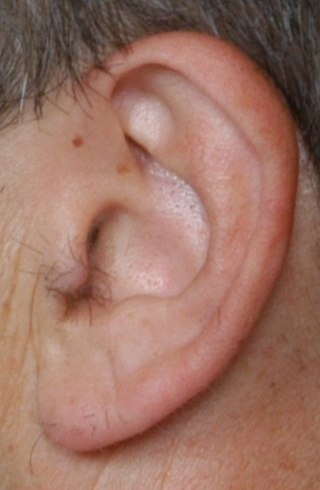

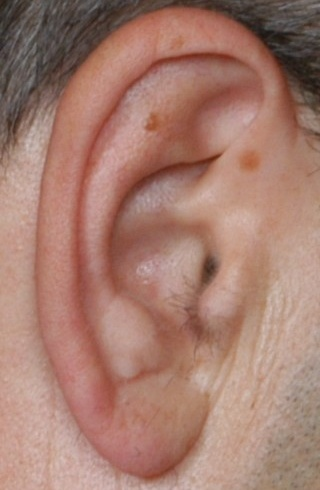

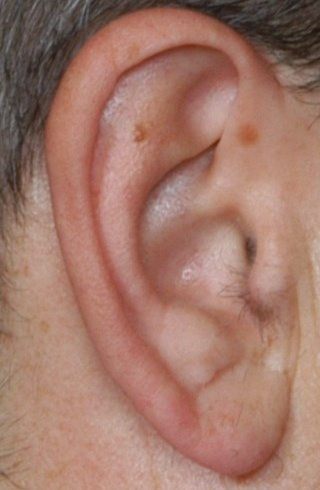

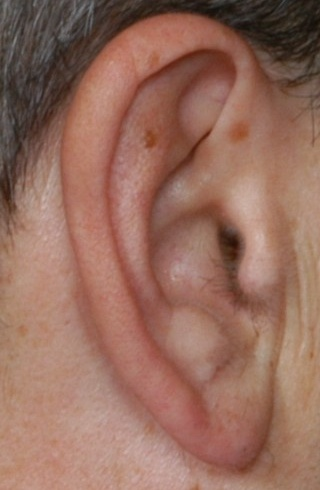

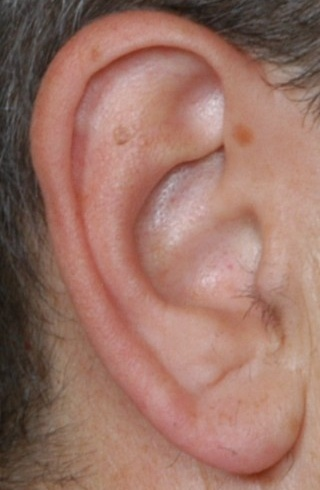

In [128]:
import pandas as pd
import random
from IPython.display import Image

#/kaggle/working/output/sorted_images/102/102_left_ear.jpg
# Concatenate the directory path with the image name
cropped_image_paths = [f"/kaggle/working/output/sorted_images/{person_id:03d}/{fname}" for person_id, fname in zip(df["Person ID"], df["Image Name"])]


# Visualize the images
for path in cropped_image_paths[:5]:
    display(Image(filename=path))

In [129]:
"""import os

output_directory = '/kaggle/working/output/contour_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

for i, image_path in enumerate(cropped_image_paths):
    # Read the image
    images = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    
    # Invert the grayscale image
    gray_inverted = cv2.bitwise_not(gray)
    
    # Create a binary thresholded image
    _, binary = cv2.threshold(gray_inverted, 170, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on a copy of the original image
    image_copy = images.copy()
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
    
    # Save the contour detection image
    filename = os.path.basename(image_path)
    filename_without_extension = os.path.splitext(filename)[0]
    directory_name = filename_without_extension.split('_')[0]
    output_directory_path = os.path.join(output_directory, directory_name)
    os.makedirs(output_directory_path, exist_ok=True)
    output_path = os.path.join(output_directory_path, filename)
    cv2.imwrite(output_path, image_copy)
    
    print(f"Contour detection image saved: {output_path}")"""


'import os\n\noutput_directory = \'/kaggle/working/output/contour_images\'\n\n# Create the output directory if it doesn\'t exist\nos.makedirs(output_directory, exist_ok=True)\n\nfor i, image_path in enumerate(cropped_image_paths):\n    # Read the image\n    images = cv2.imread(image_path)\n    \n    # Convert to grayscale\n    gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)\n    \n    # Invert the grayscale image\n    gray_inverted = cv2.bitwise_not(gray)\n    \n    # Create a binary thresholded image\n    _, binary = cv2.threshold(gray_inverted, 170, 255, cv2.THRESH_BINARY)\n    \n    # Find contours\n    contours, _ = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)\n    \n    # Draw contours on a copy of the original image\n    image_copy = images.copy()\n    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)\n    \n    # Save the contour detection image\n    filename = os.path.basename(image_path)\n    filename_without_extension = os.path.splitext(filename)

In [130]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch

# Define the directory paths
input_dir = "/kaggle/working/output/sorted_images"
output_dir = "/kaggle/working/output/augmented_images1"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the transformations to apply
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Random rotation
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomVerticalFlip(p=0.5),  # Random vertical flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),  # Random resized crop
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),  # Random affine transformation
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective transformation
    transforms.RandomGrayscale(p=0.1),  # Random grayscale
    transforms.GaussianBlur(kernel_size=3),  # Gaussian blur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3))  # Random erasing
])

# Recursively search for image files within the input directory and its subdirectories
for root, dirs, files in os.walk(input_dir):
    # Get the relative path from the input directory
    rel_path = os.path.relpath(root, input_dir)
    output_subdir = os.path.join(output_dir, rel_path)
    
    # Create the corresponding subdirectory in the output directory
    if not os.path.exists(output_subdir):
        os.makedirs(output_subdir)
    
    for filename in files:
        # Check if the file is an image with a supported extension
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Load the image
            image_path = os.path.join(root, filename)
            image = Image.open(image_path)
            # Convert PIL image to PyTorch tensor
            tensor_image = transforms.ToTensor()(image)
            # Apply transformations and save the augmented images
            for i in range(10):
                transformed_tensor = transform(tensor_image)
                transformed_image = transforms.ToPILImage()(transformed_tensor)
                output_filename = f"{filename[:-4]}_{i}.jpg"  # Append index to filename
                output_path = os.path.join(output_subdir, output_filename)
                transformed_image.save(output_path)

print("Augmentation completed successfully.")


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Augmentation completed successfully.


In [131]:
dataset_dir ='/kaggle/working/output/augmented_images1'

In [132]:
total_image_count = 0  # Initialize total image count

# Iterate over each user directory
for user_dir in os.listdir(dataset_dir):
    user_dir_path = os.path.join(dataset_dir, user_dir)
    if os.path.isdir(user_dir_path):
        # Count the number of image files in the user directory
        image_count = sum(1 for file in os.listdir(user_dir_path) if file.endswith('.jpg') or file.endswith('.png'))  # Adjust file extension filtering as needed
        print(f"Directory: {user_dir}, Image Count: {image_count}")
        total_image_count += image_count

print(f"Total Number of Images: {total_image_count}")

Directory: 024, Image Count: 70
Directory: 023, Image Count: 70
Directory: 081, Image Count: 70
Directory: 020, Image Count: 70
Directory: 001, Image Count: 70
Directory: 069, Image Count: 70
Directory: 029, Image Count: 70
Directory: 033, Image Count: 70
Directory: 064, Image Count: 70
Directory: 086, Image Count: 70
Directory: 105, Image Count: 70
Directory: 047, Image Count: 70
Directory: 003, Image Count: 70
Directory: 091, Image Count: 70
Directory: 027, Image Count: 70
Directory: 055, Image Count: 70
Directory: 036, Image Count: 70
Directory: 035, Image Count: 70
Directory: 043, Image Count: 70
Directory: 076, Image Count: 70
Directory: 072, Image Count: 70
Directory: 097, Image Count: 70
Directory: 095, Image Count: 70
Directory: 025, Image Count: 70
Directory: 084, Image Count: 70
Directory: 096, Image Count: 70
Directory: 042, Image Count: 70
Directory: 075, Image Count: 70
Directory: 088, Image Count: 70
Directory: 080, Image Count: 70
Directory: 004, Image Count: 70
Director

In [134]:
import os

def count_directories(directory_path):
    # Initialize a counter
    directory_count = 0
    
    # Iterate over the items in the directory
    for item in os.listdir(directory_path):
        # Form the full path to the item
        item_path = os.path.join(directory_path, item)
        
        # Check if the item is a directory
        if os.path.isdir(item_path):
            directory_count += 1
    
    return directory_count

# Example usage:
directory_path = '/kaggle/working/output/augmented_images1'  # Replace this with your directory path
num_directories = count_directories(directory_path)
print("Number of directories in", directory_path, ":", num_directories)


Number of directories in /kaggle/working/output/augmented_images1 : 100


In [135]:
numClasses=100
image_Shape=(224,224)

In [136]:
from PIL import Image
import os

class MakeDataset(Dataset):
    def __init__(self, root_folder, transform=None):
        self.root_folder = root_folder
        self.transform = transform
        self.classes = sorted(os.listdir(root_folder), key=lambda x: int(x))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = self.make_dataset()

    def make_dataset(self):
        images = []
        for label in self.classes:
            label_folder = os.path.join(self.root_folder, label)
            for image_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_name)
                item = (image_path, self.class_to_idx[label])
                images.append(item)
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_path, label = self.images[index]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


In [137]:
#So, the overall transformation pipeline converts input images to PyTorch tensors and
#resizes them to a specified shape (image_Shape). This pipeline is commonly used for preprocessing images in PyTorch-based deep learning pipelines.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(image_Shape),
])

In [138]:
dataset = MakeDataset(dataset_dir, transform=transform)

In [139]:
# Calculate train size as 2/3 of the dataset
train_size = int(2 * len(dataset) / 3)

# Calculate validation size as remaining 1/3
val_size = len(dataset) - train_size

# Perform the random split
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [140]:
print(len(train_dataset))
print(len(val_dataset))

4666
2334


In [141]:
batch_size = 16

In [142]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Training Samples:


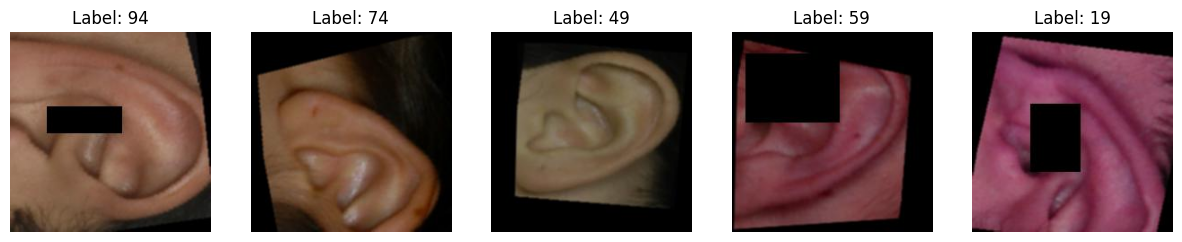

Validation Samples:


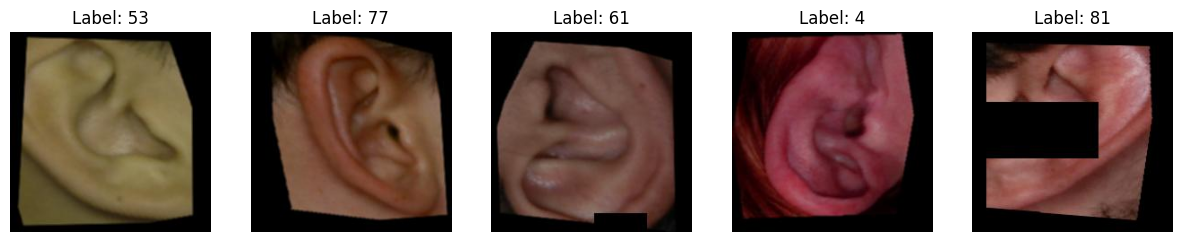

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to visualize images from a DataLoader
def visualize(loader, num_samples=5):
    # Iterate through the DataLoader to get a batch of data
    for batch_idx, (images, labels) in enumerate(loader):
        # Plot the images
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
        for i in range(num_samples):
            ax = axes[i]
            ax.imshow(np.transpose(images[i], (1, 2, 0)))
            ax.set_title(f"Label: {labels[i]}")
            ax.axis('off')
        plt.show()
        break  # Stop after displaying the first batch

# Visualize samples from the training loader
print("Training Samples:")
visualize(train_loader)

# Visualize samples from the validation loader
print("Validation Samples:")
visualize(val_loader)

In [157]:
#When pretrained=True, the ResNet-50 model will be initialized with weights that have been pre-trained on 
#the ImageNet dataset
import torchvision.models as models
import torch.nn as nn

# Load the pretrained MobileNet model
model = models.resnet50(pretrained=True)

# Modify the classifier part
model.fc = nn.Linear(model.fc.in_features, numClasses)




"""# Load the pretrained VGG16 model
model = models.vgg19(pretrained=True)

#In VGG16, the classifier is defined as a sequence of layers, where the last layer is a fully connected (linear) layer.
#By accessing model.classifier[6], you are retrieving the last layer in the classifier.
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, numClasses)"""

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'# Load the pretrained VGG16 model\nmodel = models.vgg19(pretrained=True)\n\n#In VGG16, the classifier is defined as a sequence of layers, where the last layer is a fully connected (linear) layer.\n#By accessing model.classifier[6], you are retrieving the last layer in the classifier.\nnum_features = model.classifier[6].in_features\nmodel.classifier[6] = nn.Linear(num_features, numClasses)'

In [158]:
#After executing this line, the ResNet-50 model will have its final fully connected layer replaced with a new one suitable
#for your classification task with the specified number of output classes (numClasses).
# model.fc = nn.Linear(model.fc.in_features, numClasses)

In [159]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#In summary, this scheduler decreases the learning rate by a factor of 0.1 every 7 epochs. 
#This is a common technique used in training deep learning models to help stabilize training and improve convergence.
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [160]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [161]:
torch.cuda.empty_cache()

In [162]:
model = model.to(device)

In [163]:
num_epochs = 20
desired_training_accuracy = 99.999
early_stopping_threshold = 5
early_stopping_counter = 0
best_val_loss = float('inf')

In [164]:
# Lists to store training and validation metrics for plotting curves
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
predictions = []
targets = []

In [165]:
import time

start_time = time.time()

In [166]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Print training loss and accuracy every 100 batches
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(train_loader)}, '
                  f'Training Loss: {running_loss / 100}, Training Accuracy: {100 * correct_train / total_train}%')
            running_loss = 0.0

    # Calculate training accuracy after the epoch
    training_accuracy = correct_train / total_train

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

            # Append predictions and targets for confusion matrix
            predictions.append(predicted_val.cpu().numpy())
            targets.append(labels.cpu().numpy())
    # done here
    # Calculate validation accuracy after the epoch
    validation_accuracy = correct_val / total_val
    average_val_loss = val_running_loss / len(val_loader)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {running_loss / len(train_loader)}, '
          f'Training Accuracy: {100 * training_accuracy}%, '
          f'Validation Loss: {average_val_loss}, '
          f'Validation Accuracy: {100 * validation_accuracy}%')

    # Append training and validation metrics for plotting
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(training_accuracy)
    val_losses.append(average_val_loss)
    val_accuracies.append(validation_accuracy)

    scheduler.step()
    
     # Early stopping based on validation loss
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_threshold:
        print(f'Early stopping: No improvement in validation loss for {early_stopping_threshold} epochs.')
        break

Epoch 1/20, Batch 100/292, Training Loss: 4.464658093452454, Training Accuracy: 5.5%
Epoch 1/20, Batch 200/292, Training Loss: 3.5757818365097047, Training Accuracy: 14.5%
Epoch 1/20, Training Loss: 0.8376378196559541, Training Accuracy: 24.13201885983712%, Validation Loss: 1.9182543289171505, Validation Accuracy: 60.32562125107113%
Epoch 2/20, Batch 100/292, Training Loss: 1.5688934421539307, Training Accuracy: 76.3125%
Epoch 2/20, Batch 200/292, Training Loss: 1.106674947142601, Training Accuracy: 79.78125%
Epoch 2/20, Training Loss: 0.25087772146479725, Training Accuracy: 82.87612516073725%, Validation Loss: 0.705237894637944, Validation Accuracy: 88.56041131105398%
Epoch 3/20, Batch 100/292, Training Loss: 0.30956969141960144, Training Accuracy: 98.125%
Epoch 3/20, Batch 200/292, Training Loss: 0.2261487493664026, Training Accuracy: 98.34375%
Epoch 3/20, Training Loss: 0.061532594289069306, Training Accuracy: 98.52121731675953%, Validation Loss: 0.22503116987135313, Validation Accu

In [167]:
end_time = time.time()

duration_seconds = end_time - start_time
duration_minutes = duration_seconds / 60

print("Training duration: {:.2f} minutes".format(duration_minutes))

Training duration: 12.94 minutes


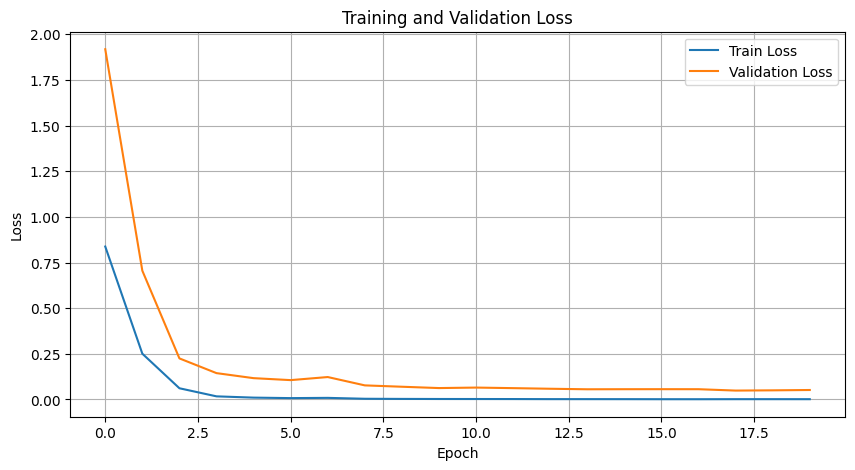

In [168]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

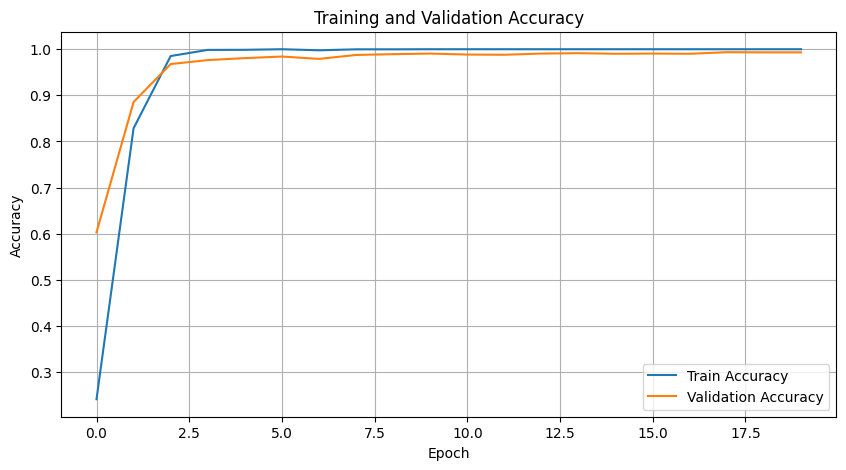

In [169]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
import os
import shutil

def clear_directory(directory):
    # Iterate over each file and directory in the specified directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        try:
            if os.path.isfile(item_path):
                os.remove(item_path)  # Delete the file
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)  # Delete the directory and its contents recursively
        except Exception as e:
            print(f"Error deleting {item_path}: {e}")

# Specify the directory to clear
directory_to_clear = '/kaggle/working/'

# Clear the directory
clear_directory(directory_to_clear)
